Epoch 1/100


c:\HES-SO\TSM-AnSeqDa\TSM-AnSeqDa\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 288ms/step - loss: 0.2264 - val_loss: 0.2266 - learning_rate: 0.0010
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1175 - val_loss: 0.0677 - learning_rate: 0.0010
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0350 - val_loss: 0.0339 - learning_rate: 0.0010
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0465 - val_loss: 0.0494 - learning_rate: 0.0010
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0385 - val_loss: 0.0733 - learning_rate: 0.0010
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0380 - val_loss: 0.0570 - learning_rate: 0.0010
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0353 - val_loss: 0.0442 - learning_rate: 0.0010
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0339 - val_loss: 0.0450 - learning_rate: 0.0010
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0342 - val_loss: 0.0526 - learning_rate: 0.0010
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0

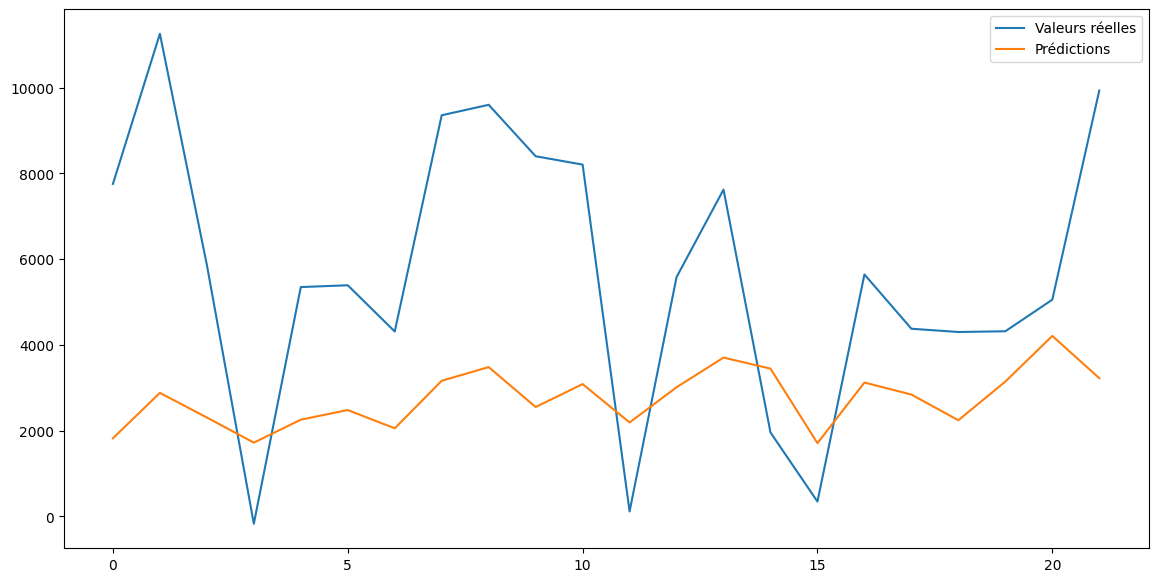

MSE: 16883924.88868667
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step

C:\Users\Altin\AppData\Local\Temp\ipykernel_27000\1926074829.py:84: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_sequence[0, -1, 0] = next_value


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


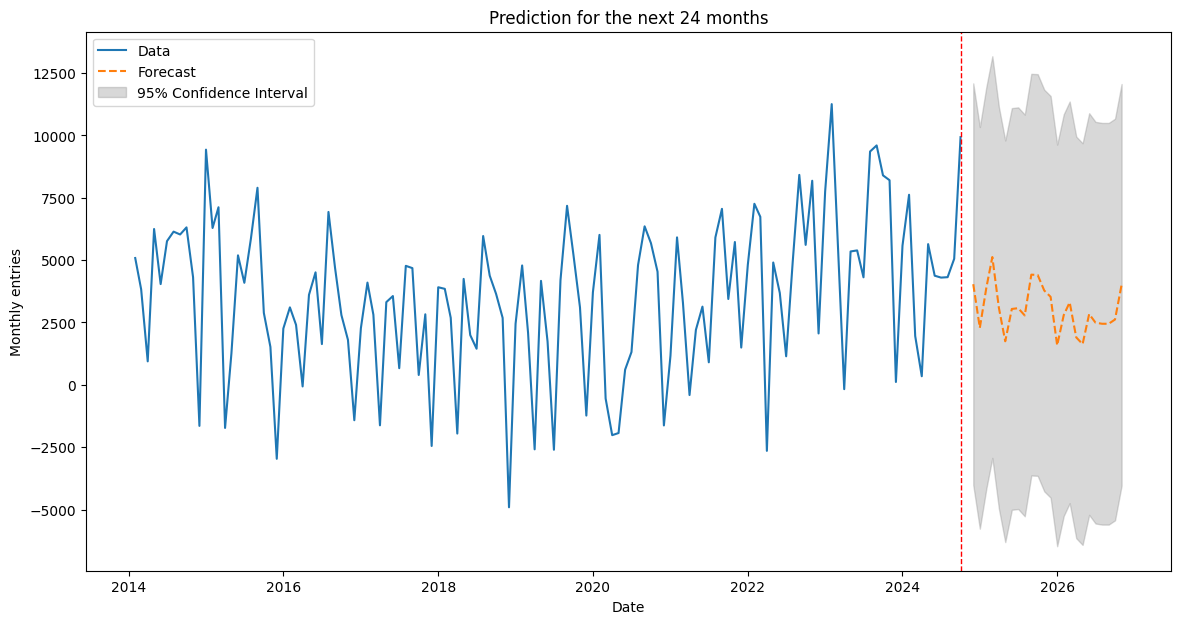

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

# Charger les données
data = pd.read_csv('dataset_reformate2.csv')
data['date'] = pd.to_datetime(data['date'])

# Filtrer les données pour les pays pertinents
countries = ["Total Europe", "Total Africa", "Total America", "Total Asia", "Total Oceania", "Total Unknown Origin"]
df_countries = data[data['pays'].isin(countries)]
germany_data = df_countries.groupby('date').sum().reset_index()

# Extraire les valeurs de la variable cible
values = germany_data['entree_mensuelle'].values

# Normaliser les données
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values.reshape(-1, 1))

# Paramètres de la séquence temporelle
sequence_length = 12 * 2  # Utiliser les 24 derniers mois pour prédire le suivant

# Créer les séquences temporelles
X, y = [], []
for i in range(len(scaled_values) - sequence_length):
    X.append(scaled_values[i:i + sequence_length])
    y.append(scaled_values[i + sequence_length][0])

X, y = np.array(X), np.array(y)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = X[:len(X) - 22], X[len(X) - 22:], y[:len(y) - 22], y[len(y) - 22:]

# Modèle LSTM
model = Sequential([
    Bidirectional(LSTM(100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True)),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Compiler le modèle
model.compile(optimizer='adam', loss='mean_squared_error')

# Callback pour ajuster le taux d'apprentissage
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1, callbacks=[reduce_lr])

# Prédire les valeurs de test
predicted_values = model.predict(X_test)

# Inverser la normalisation des prédictions
predicted_values = scaler.inverse_transform(predicted_values)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualiser les résultats
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Valeurs réelles')
plt.plot(predicted_values, label='Prédictions')
plt.legend()
plt.show()

# Calculer l'erreur quadratique moyenne
mse = np.mean(np.square(y_test - predicted_values))
print(f'MSE: {mse}')

# Prédire les mois futurs
n_months_to_predict = 12 * 2
last_sequence = scaled_values[-sequence_length:].reshape(1, sequence_length, 1)
future_predictions = []

for _ in range(n_months_to_predict):
    next_value = model.predict(last_sequence)
    future_predictions.append(next_value[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_value

# Inverser la normalisation des prédictions futures
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

# Calculer l'écart-type et l'IC à 95 %
std_dev = np.sqrt(mse)
confidence_factor = 1.96
upper_bound = future_predictions + confidence_factor * std_dev
lower_bound = future_predictions - confidence_factor * std_dev

# Définir la plage de dates pour les prédictions futures
start_date = pd.Timestamp('2024-11-01')
future_dates = pd.date_range(start=start_date, periods=n_months_to_predict, freq='ME')

# Ajouter un décalage aux prédictions
#offset = 6000
#future_predictions += offset
#upper_bound += offset
#lower_bound += offset

# Visualiser les prédictions futures avec l'IC
plt.figure(figsize=(14, 7))
plt.plot(germany_data['date'], germany_data['entree_mensuelle'], label='Data')
plt.plot(future_dates, future_predictions, label='Forecast', linestyle='--')
plt.fill_between(future_dates, lower_bound, upper_bound, color='gray', alpha=0.3, label='95% Confidence Interval')
#plt.axvline(x=germany_data['date'].iloc[-1], color='r', linestyle='--', linewidth=1)
plt.legend()
plt.title('Prediction for the next 24 months')
plt.xlabel('Date')
plt.ylabel('Monthly entries')
plt.show()